In [99]:
import os
import numpy as np
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt

# Importing data and data preprocessing

In [66]:
df = pd.read_table("C:/Users/sinha/Downloads/SMSSpamCollection", names = ["class", "document"])

In [67]:
df.head()

,class,document
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [68]:
df["class"].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

In [69]:
# Encoding 1 and 0 to class ham and spam
df["class"] = df["class"].map({"ham": 0, "spam":1})

In [70]:
df.head()

,class,document
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Splitting into test train split

In [71]:
X_train, X_test,  y_train, y_test = train_test_split(df.document, df["class"], random_state=100)

In [72]:
# creating bag of words for the document
# using Countvectorize

In [73]:
vec = CountVectorizer(stop_words="english")

vec_train = vec.fit_transform(X_train)

In [74]:
X_train_transformed = vec_train
X_test_transformed = vec.transform(X_test)

## Building and Evaluating the model

In [77]:
# creting multinimial object for building
mnb = MultinomialNB()

# fitting the X_train 
mnb.fit(X_train_transformed, y_train)

# predicting on test
y_test_pred = mnb.predict_proba(X_test_transformed)

# predict class
y_test_pred_class = mnb.predict(X_test_transformed)

y_test_pred_class

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

## Model Evaluation

In [79]:
# Accuracy
accuracy_score(y_test, y_test_pred_class)

0.9849246231155779

In [81]:
# creating confusion matrix
confusion = confusion_matrix(y_test, y_test_pred_class)

In [82]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [84]:
sensitivity = TP/float(TP+FN)
print("sensitivity", sensitivity)

sensitivity 0.9358288770053476


In [85]:
print(confusion)

[[1197    9]
 [  12  175]]


In [86]:
specificity = TN/float(TN+FP)
print("specificity", specificity)

specificity 0.9925373134328358


In [87]:
precision = TP/float(TP+FP)
print("precision", precision)

precision 0.9510869565217391


In [89]:
metrics.precision_score(y_test, y_test_pred_class)

0.9510869565217391

In [91]:
y_test.head()

601     0
3183    0
1229    1
1711    0
1248    0
Name: class, dtype: int64

In [93]:
y_test_pred

array([[9.94376989e-01, 5.62301143e-03],
       [9.99088733e-01, 9.11267326e-04],
       [7.02246819e-14, 1.00000000e+00],
       ...,
       [9.99999054e-01, 9.45825103e-07],
       [2.09655468e-11, 1.00000000e+00],
       [9.99822333e-01, 1.77667277e-04]])

In [94]:
fpr, tpr , thresholds = metrics.roc_curve(y_test, y_test_pred[:,1])
area_roc = metrics.auc(fpr,tpr)

In [95]:
df_roc = pd.DataFrame({"FPR":fpr, "TPR":tpr, "thresholds":thresholds})

In [97]:
df_roc.head()

,FPR,TPR,thresholds
0,0.0,0.000000,2.0
1,0.0,0.310160,1.0
2,0.0,0.320856,1.0
3,0.0,0.342246,1.0
4,0.0,0.347594,1.0


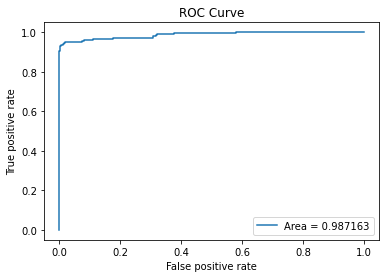

In [101]:
plt.plot(fpr, tpr, label="Area = %2f" %area_roc)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Building model through Bernoulli Classifier

In [103]:
# creting Bernoulli object for building
bnb = BernoulliNB()

# fitting the X_train 
bnb.fit(X_train_transformed, y_train)

# predicting on test
y_test_pred = mnb.predict_proba(X_test_transformed)

# predict class
y_test_pred_class = bnb.predict(X_test_transformed)

y_test_pred_class

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [104]:
print(accuracy_score(y_test, y_test_pred_class))

0.9741564967695621


In [105]:
# creating confusion matrix
confusion = confusion_matrix(y_test, y_test_pred_class)

In [106]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [107]:
specificity = TN/float(TN+FP)
print("specificity", specificity)

specificity 0.9991708126036484


In [108]:
sensitivity = TP/float(TP+FN)
print("sensitivity", sensitivity)

sensitivity 0.8128342245989305


In [109]:
precision = TP/float(TP+FP)
print("precision", precision)

precision 0.9934640522875817
